# Corona Virus Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
sbn.set(rc={'figure.figsize':(11.7,8.27)})


In [2]:
rawData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [3]:
dataFrames = dict(states={}, counties={})
columns = ['cases', 'deaths']

def getTotal(): 
    if not "total" in dataFrames:
        dataFrames["total"] =rawData.groupby('date').sum()[columns]
    return dataFrames["total"]

def getState(state):
    if not state in dataFrames["states"]:
        statedf = rawData[rawData.state==state].groupby('date').sum()[columns]
        if statedf.empty:
            print (state + " is not in the data, did you spell it right? capitalization?")
            return 
        else:
            dataFrames["states"][state] = statedf
    return dataFrames["states"][state]

def getCounty(county):
    if not county in dataFrames["counties"]:
        countydf = rawData[rawData.county==county].groupby('date').sum()[columns]
        if countydf.empty:
            print(county + " is not in the data, did you spell it right? capitalization?")
            return
        else:
            dataFrames["counties"][county] = countydf
    return dataFrames["counties"][county]
        

In [4]:
yesterday, today = getTotal().tail(2).index.values # last two dates data to check how recent this data is
print("Latest date: ", today)

Latest date:  2020-04-10


In [5]:

yesterdayLatest = rawData[rawData.date == yesterday].groupby(['state', 'county']).sum()[columns]
latest = rawData[rawData.date == today].groupby(['state', 'county']).sum()[columns]
deltas = latest - yesterdayLatest
latest["newcases"] = deltas.cases
latest["newdeaths"] = deltas.deaths
latest = latest.reset_index()

In [6]:
print("Counties with the most new cases:", today)
latest.sort_values('newcases', ascending=False)[:30]

Counties with the most new cases: 2020-04-10


state           county  cases  deaths  newcases  newdeaths
1551       New York    New York City  92384    5663    5356.0      513.0
1550       New York           Nassau  21512     890    1372.0      112.0
1570       New York          Suffolk  18692     425    1279.0       56.0
1578       New York      Westchester  18077     428    1073.0       39.0
561        Illinois             Cook  12472     398    1057.0       47.0
1476     New Jersey           Bergen   8928     390     585.0       45.0
1483     New Jersey           Hudson   6411     163     532.0       31.0
1481     New Jersey            Essex   6580     352     511.0       40.0
1075  Massachusetts          Suffolk   4534      66     493.0       17.0
1929   Pennsylvania     Philadelphia   5521     110     492.0       24.0
180      California      Los Angeles   8430     241     475.0       18.0
1562       New York         Rockland   7122     135     457.0       18.0
1150       Michigan            Wayne  10539     609     446.0      105.0
1556       New York           Orange   4532      91     442.0       12.0
1486     New Jersey        Middlesex   5060     168     432.0       16.0
1071  Massachusetts        Middlesex   4447     109     402.0       16.0
329         Florida       Miami-Dade   6299      84     402.0       18.0
1494     New Jersey            Union   5575     161     372.0       16.0
1067  Massachusetts            Essex   2670      79     334.0       19.0
1490     New Jersey          Passaic   5017     101     327.0       19.0
273     Connecticut        Fairfield   5180     203     298.0       25.0
1951   Rhode Island          Unknown    712      29     288.0        6.0
495         Georgia          Unknown   1226       5     275.0       -3.0
1131       Michigan          Oakland   4511     282     264.0       36.0
1487     New Jersey         Monmouth   3496     107     248.0        9.0
1055       Maryland  Prince George's   1716      42     240.0        7.0
2480     Washington             King   4119     279     231.0       19.0
1077  Massachusetts        Worcester   1678      37     217.0        7.0
2196          Texas           Harris   3261      40     214.0        6.0
1073  Massachusetts          Norfolk   2216      64     209.0       14.0

In [7]:
print("Counties with the most new cases in California:", today)
latest[latest.state=="California"].sort_values('newcases', ascending=False)[:10]

Counties with the most new cases in California: 2020-04-10


state          county  cases  deaths  newcases  newdeaths
180  California     Los Angeles   8430     241     475.0       18.0
195  California  San Bernardino    810      25      81.0        1.0
197  California   San Francisco    800      13      73.0        3.0
192  California       Riverside   1350      39      70.0        6.0
196  California       San Diego   1696      44      68.0        4.0
189  California          Orange   1138      17      59.0        0.0
202  California     Santa Clara   1484      50      42.0        2.0
193  California      Sacramento    652      24      40.0        2.0
177  California            Kern    363       3      33.0        0.0
163  California         Alameda    766      20      32.0        3.0

In [8]:
print("Counties with the most new cases in Colorado:", today)
latest[latest.state=="Colorado"].sort_values('newcases', ascending=False)[:10]

Counties with the most new cases in Colorado: 2020-04-10


state     county  cases  deaths  newcases  newdeaths
229  Colorado     Denver   1113      42      82.0        4.0
216  Colorado      Adams    543      23      68.0        7.0
218  Colorado   Arapahoe    931      30      54.0        6.0
271  Colorado       Weld    649      40      35.0        4.0
231  Colorado      Eagle    426       5      32.0        0.0
241  Colorado  Jefferson    683      25      23.0        0.0
221  Colorado    Boulder    234       7      17.0        0.0
232  Colorado    El Paso    550      33      16.0        1.0
230  Colorado    Douglas    282      10      12.0        0.0
259  Colorado     Pitkin     47       2       8.0        0.0

In [9]:
print("Counties with the most new deaths:", today)
latest.sort_values('newdeaths', ascending=False)[:30]

Counties with the most new deaths: 2020-04-10


state         county  cases  deaths  newcases  newdeaths
1551       New York  New York City  92384    5663    5356.0      513.0
1550       New York         Nassau  21512     890    1372.0      112.0
1150       Michigan          Wayne  10539     609     446.0      105.0
1570       New York        Suffolk  18692     425    1279.0       56.0
561        Illinois           Cook  12472     398    1057.0       47.0
1476     New Jersey         Bergen   8928     390     585.0       45.0
1481     New Jersey          Essex   6580     352     511.0       40.0
1578       New York    Westchester  18077     428    1073.0       39.0
1131       Michigan        Oakland   4511     282     264.0       36.0
1119       Michigan         Macomb   2973     197     190.0       32.0
1483     New Jersey         Hudson   6411     163     532.0       31.0
681         Indiana         Marion   2600     107     185.0       26.0
1924   Pennsylvania     Montgomery   1889      62     196.0       25.0
273     Connecticut      Fairfield   5180     203     298.0       25.0
1929   Pennsylvania   Philadelphia   5521     110     492.0       24.0
277     Connecticut      New Haven   2383      98     200.0       20.0
2480     Washington           King   4119     279     231.0       19.0
1067  Massachusetts          Essex   2670      79     334.0       19.0
1490     New Jersey        Passaic   5017     101     327.0       19.0
329         Florida     Miami-Dade   6299      84     402.0       18.0
180      California    Los Angeles   8430     241     475.0       18.0
1562       New York       Rockland   7122     135     457.0       18.0
1488     New Jersey         Morris   2771     135     126.0       18.0
1075  Massachusetts        Suffolk   4534      66     493.0       17.0
1494     New Jersey          Union   5575     161     372.0       16.0
1486     New Jersey      Middlesex   5060     168     432.0       16.0
1071  Massachusetts      Middlesex   4447     109     402.0       16.0
1073  Massachusetts        Norfolk   2216      64     209.0       14.0
967       Louisiana          Caddo    950      39      44.0       13.0
274     Connecticut       Hartford   1615      88     144.0       13.0

In [10]:
print("Counties with the most new deaths in California:", today)
latest[latest.state=="California"].sort_values('newdeaths', ascending=False)[:10]

Counties with the most new deaths in California: 2020-04-10


state         county  cases  deaths  newcases  newdeaths
180  California    Los Angeles   8430     241     475.0       18.0
192  California      Riverside   1350      39      70.0        6.0
196  California      San Diego   1696      44      68.0        4.0
197  California  San Francisco    800      13      73.0        3.0
163  California        Alameda    766      20      32.0        3.0
213  California        Ventura    298      10      24.0        3.0
202  California    Santa Clara   1484      50      42.0        2.0
193  California     Sacramento    652      24      40.0        2.0
172  California         Fresno    191       5      18.0        2.0
169  California   Contra Costa    511       9      27.0        1.0

In [11]:
print("Counties with the most new deaths in Colorado:", today)
latest[latest.state=="Colorado"].sort_values('newdeaths', ascending=False)[:10]

Counties with the most new deaths in Colorado: 2020-04-10


state     county  cases  deaths  newcases  newdeaths
216  Colorado      Adams    543      23      68.0        7.0
218  Colorado   Arapahoe    931      30      54.0        6.0
271  Colorado       Weld    649      40      35.0        4.0
229  Colorado     Denver   1113      42      82.0        4.0
232  Colorado    El Paso    550      33      16.0        1.0
269  Colorado    Unknown    145       1     -88.0        1.0
268  Colorado     Teller     12       2       0.0        1.0
264  Colorado      Routt     35       1       3.0        1.0
252  Colorado  Montezuma     12       2       4.0        1.0
253  Colorado   Montrose     38       3       0.0        0.0

In [12]:
def fitExponential(series):
    series = series.dropna()
    series = series[series>0]
    logseries = np.log(series)
    n = len(logseries)
    rate, intercept = np.polyfit(np.arange(n), logseries, 1) 
    base = np.exp(intercept)
    return (rate, base, n) 


In [13]:
def plotFitted(series, name, log=True): 
    (rate, base, n) = fitExponential(series)
    x = np.arange(n)
    series = series[-n:]
    if log:
        plt.semilogy()
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    sbn.scatterplot(x, series, label=f"{name} actual")
    sbn.lineplot(x, base * np.exp(rate*x) , label=f"{name} expected with constant exponential growth")
    plt.show()

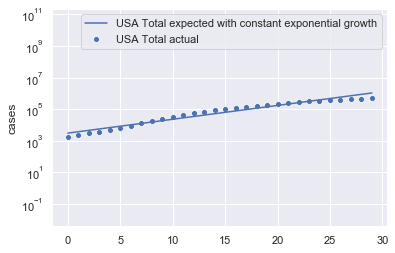

In [14]:
plotFitted(getTotal()["cases"][-30:], "USA Total")

In [15]:
def growthRateAnalysis(series, name, n=30):
    rate, base, n = fitExponential(series[-n:])
    name = f"{name} {series.name}"
    formula = f"{series.name} = {np.round(base, 2)} * exp({np.round(rate, 4)} * day)"
    dailyGrowth = np.round(100 * (np.exp(rate) - 1), 2)
    daysToDoubling = np.round(np.log(2)/rate, 2)
    print(f"{name} exponential formula fitted with {n} points:")
    print(formula)
    print(f"fitted daily growth rate: {dailyGrowth} %, fitted days to doubling: {daysToDoubling}")
    deltas = series.diff(1)
    rates = 100*deltas/series
    data = {
        f"{name} day to day growth rate (%)":rates, 
        f"{name} 3 day moving average":rates.rolling(window=3).mean(), 
        f"{name} 5 day moving average":rates.rolling(window=5).mean(), 
    }
    df = pd.DataFrame(data).dropna()[-n:]
    gr = df.tail(1)[f"{name} 5 day moving average"].values[0]
    dailyGrowth = np.round(gr, 2)
    daysToDoubling = np.round(np.log(2)*100/gr, 2)
    print(f"actual daily growth rate: {dailyGrowth} %, actual days to doubling: {daysToDoubling}")    
    sbn.lineplot(data=df)
    plt.show()
    plotFitted(series[-n:], name)


Total USA cases exponential formula fitted with 30 points:
cases = 2975.87 * exp(0.2023 * day)
fitted daily growth rate: 22.42 %, fitted days to doubling: 3.43
actual daily growth rate: 7.5 %, actual days to doubling: 9.24


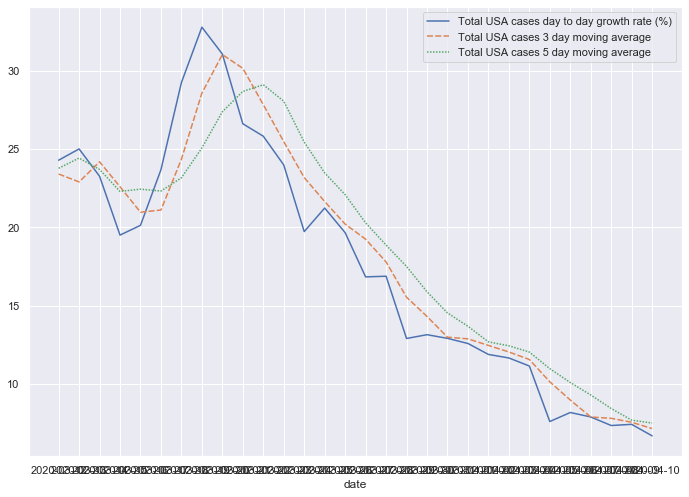

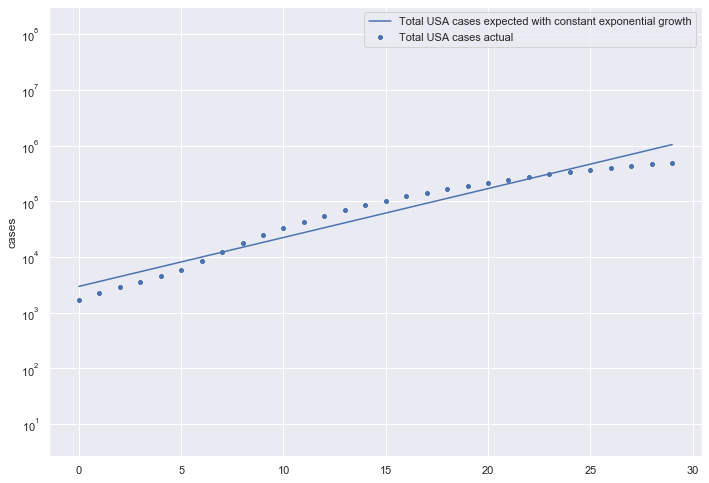

In [16]:
growthRateAnalysis(getTotal()['cases'], "Total USA")

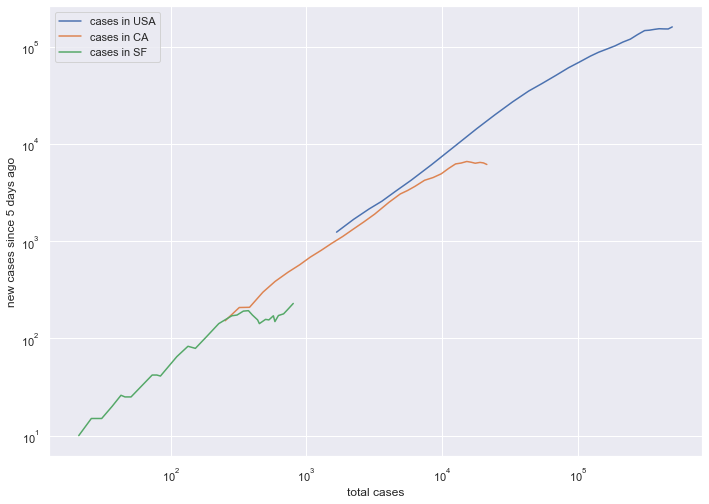

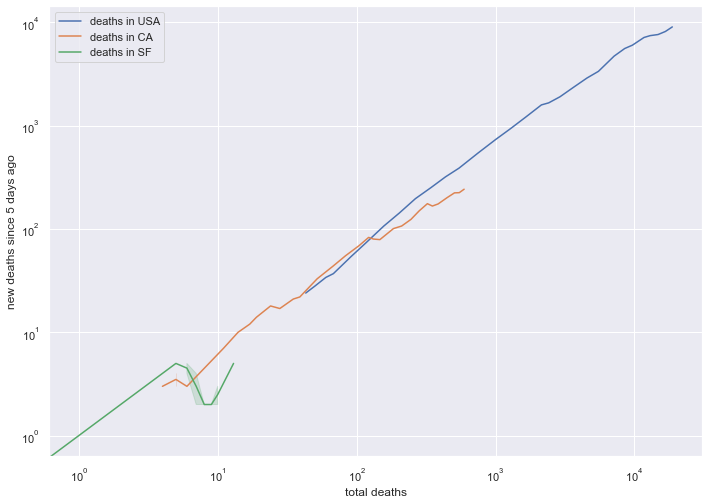

In [17]:
def trajectoryPlot(series, name):
    deltas = series.diff(5)
    fullname = f"{series.name} in {name}"
    x = f"total {series.name}"
    y = f"new {series.name} since 5 days ago"
    data = {x: series, y: deltas}
    plt.loglog()
    df = pd.DataFrame(data).dropna()[-30:]
    sbn.lineplot(x, y, data=df, label=fullname)
    
trajectoryPlot(getTotal()['cases'], "USA")
trajectoryPlot(getState("California")['cases'], "CA")
trajectoryPlot(getCounty("San Francisco")["cases"], "SF")
plt.show()
trajectoryPlot(getTotal()['deaths'], "USA")
trajectoryPlot(getState("California")['deaths'], "CA")
trajectoryPlot(getCounty("San Francisco")["deaths"], "SF")
plt.show()

In [18]:
def laggedPlot(df, name):
    vals = df.copy()
    vals = df.dropna()[df.cases > 0]
    # show correlation with wide range of time lags
    for i in range(30):
        vals[i] = df.cases.shift(i)
    vals = vals.drop(columns='cases')
    vals = vals[vals.deaths > 0][-20:]
    corrs = vals.corr()[['deaths']].drop('deaths')
    lc = np.log(vals).corr()[['deaths']].drop('deaths')
    lc[0] = lc.deaths
    for i in [3, 5, 7]:
        lc[i] = lc.deaths.rolling(i).mean()
    lc = lc.dropna()
    corrdata = {
        f"{name} correlation of log of deaths to log of cases by # of days ago": lc[0],
        f"{name} correlation 3 day moving average": lc[3],
        f"{name} correlation 5 day moving average": lc[5],
        f"{name} correlation 7 day moving average": lc[7],
    }
    corrsdf = pd.DataFrame(corrdata)
    print(f"Correlations for {name}:")
    sbn.lineplot(data=corrsdf)
    plt.show()
    # dig deeper into an interesting set of time lags
    values = vals[["deaths"]].copy()
    ratios = vals[["deaths"]].copy()
    interesting = [7, 14]
    for i in [0, 3, 5, 7]:
        l = lc[i].dropna()
        lmax = l[l==max(l)] # max at this correlation moving average
        interesting += list(lmax.index)
    for i in sorted(list(set(interesting))):
        values[f"{name} cases {i} days ago"] = vals[i]
        ratios[f"{name} deaths/cases {i} days ago"] = vals.deaths/vals[i]
    ratios = ratios.drop(columns=['deaths'])
    print(f"Deaths vs Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=values, dashes=False)
    plt.show()
    print(f"Deaths / Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=ratios, dashes=False)
    plt.show()

    

In [19]:
# laggedPlot(getTotal(), "USA")
# laggedPlot(getState("California"), "CA")
# laggedPlot(getCounty("San Francisco"), "SF")

In [20]:
def analyse(counties=[], states=[], n=20):
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    names = counties + states + ["USA total:"]
    rates= []
    dfs = [getCounty(c) for c in counties] + [getState(s) for s in states] + [getTotal()] 
    print("Trajectory Plots to see if the curve is flattening:")
    for col in ["cases", "deaths"]:
        for df, name in zip(dfs, names):
            trajectoryPlot(df[col], name)
        plt.show()
    for df, name in zip(dfs, names):
        print(f"\n### Analysis for {name:} ###\n")
        growthRateAnalysis(df["cases"], name)
        growthRateAnalysis(df["deaths"], name)
        print(f"Trajectory plots for {name}, to see when the curve starts flattening")
        trajectoryPlot(df.cases, name)
        trajectoryPlot(df.deaths, name)
        plt.show()
        laggedPlot(df, name)


        
    
    

Trajectory Plots to see if the curve is flattening:


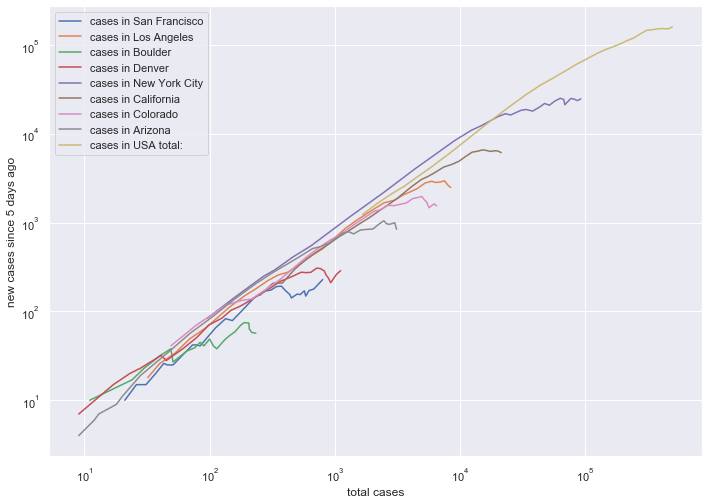

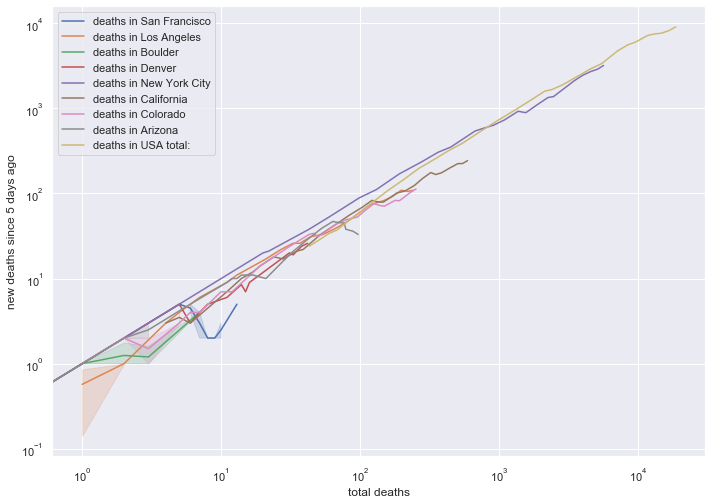


### Analysis for San Francisco ###

San Francisco cases exponential formula fitted with 30 points:
cases = 28.39 * exp(0.1278 * day)
fitted daily growth rate: 13.63 %, fitted days to doubling: 5.43
actual daily growth rate: 6.49 %, actual days to doubling: 10.67


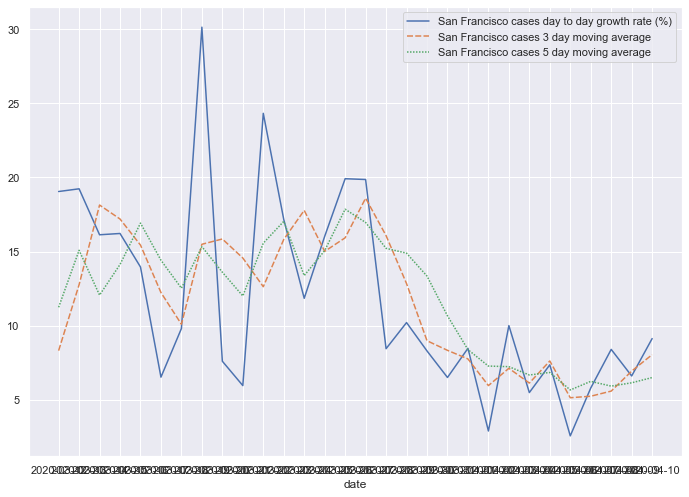

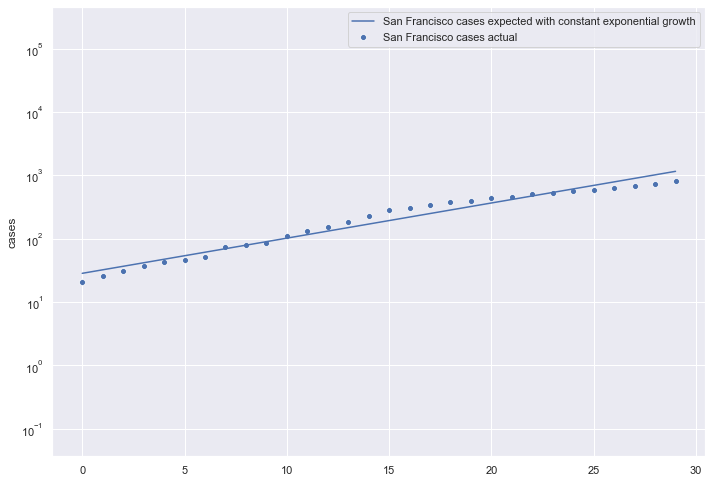

San Francisco deaths exponential formula fitted with 17 points:
deaths = 2.32 * exp(0.1148 * day)
fitted daily growth rate: 12.17 %, fitted days to doubling: 6.04
actual daily growth rate: 8.84 %, actual days to doubling: 7.84


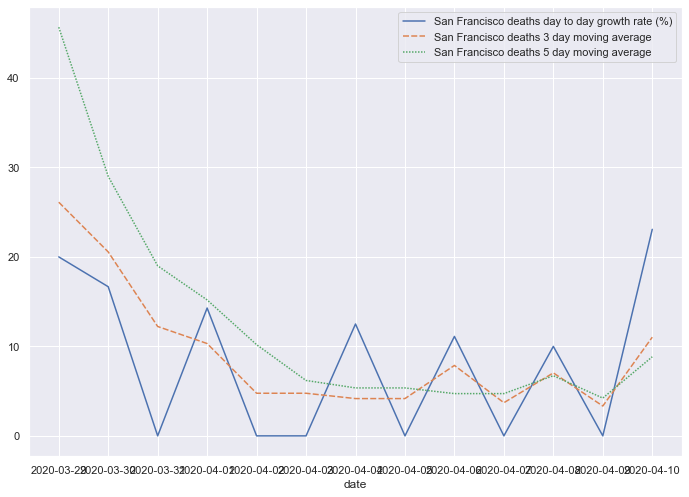

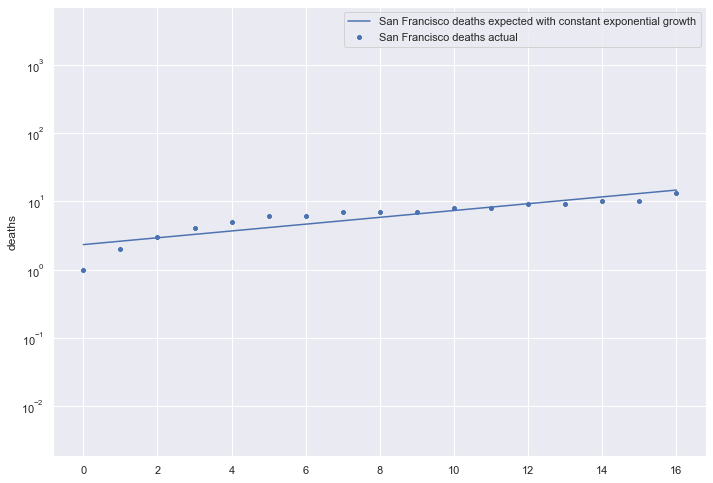

Trajectory plots for San Francisco, to see when the curve starts flattening


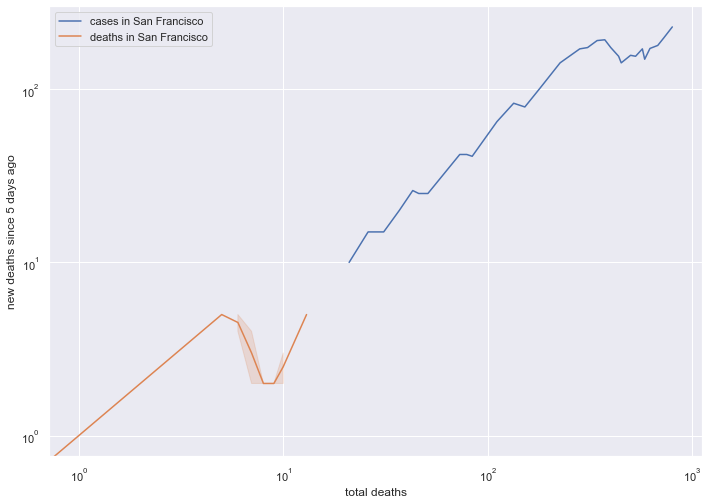

Correlations for San Francisco:


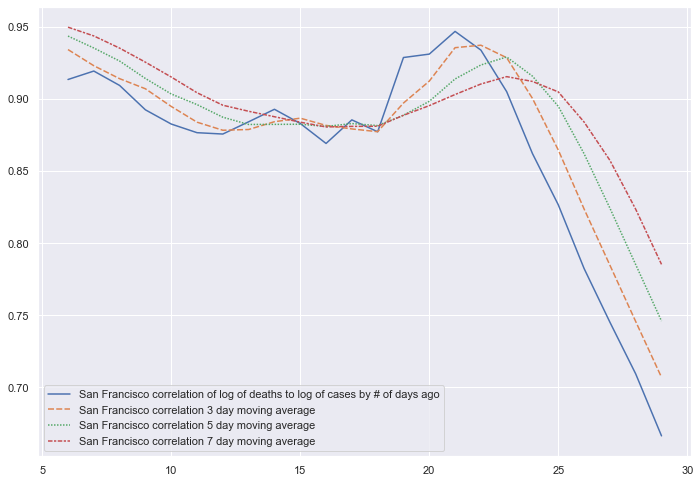

Deaths vs Lagged Values For San Francisco:


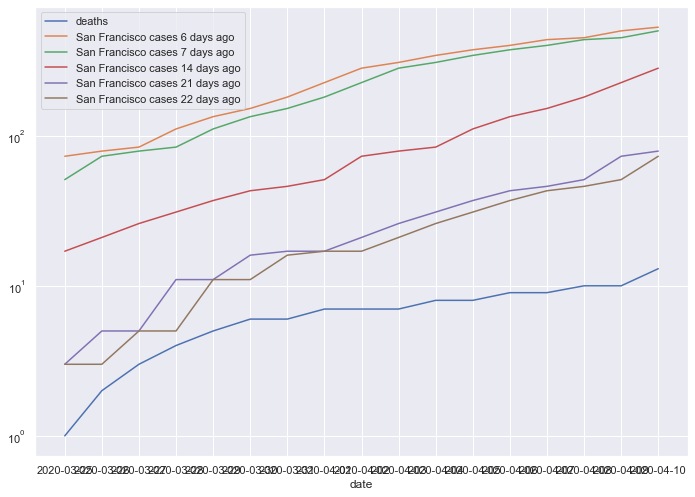

Deaths / Lagged Values For San Francisco:


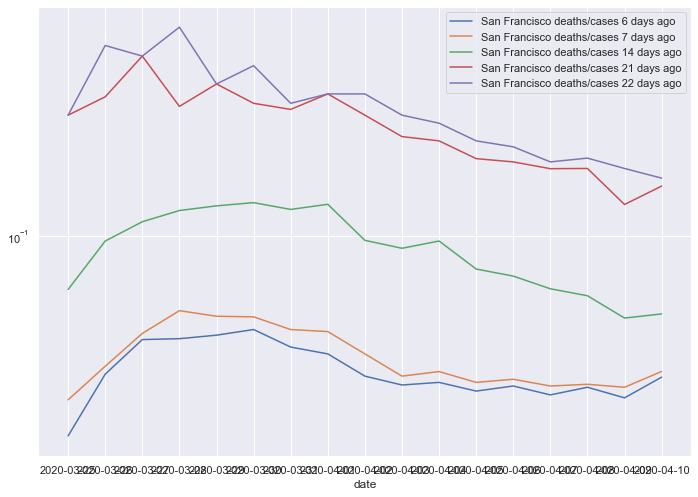


### Analysis for Los Angeles ###

Los Angeles cases exponential formula fitted with 30 points:
cases = 51.83 * exp(0.1983 * day)
fitted daily growth rate: 21.93 %, fitted days to doubling: 3.5
actual daily growth rate: 6.75 %, actual days to doubling: 10.26


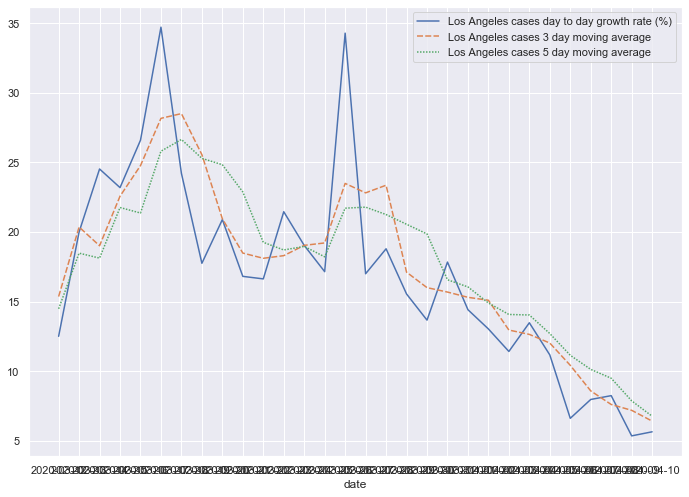

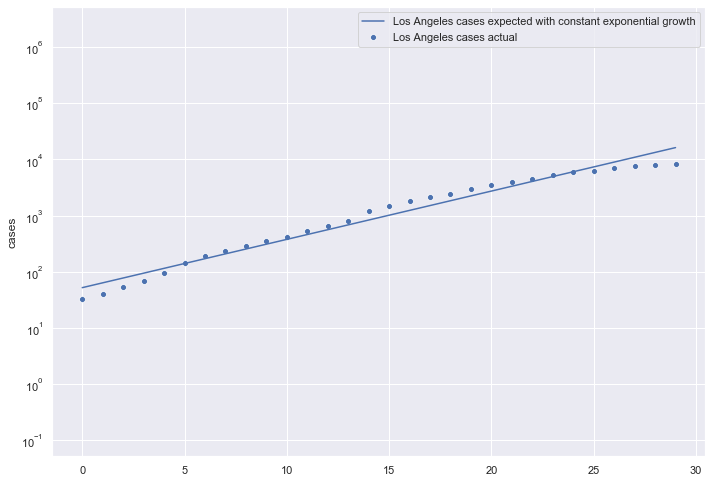

Los Angeles deaths exponential formula fitted with 30 points:
deaths = 0.58 * exp(0.2252 * day)
fitted daily growth rate: 25.26 %, fitted days to doubling: 3.08
actual daily growth rate: 11.31 %, actual days to doubling: 6.13


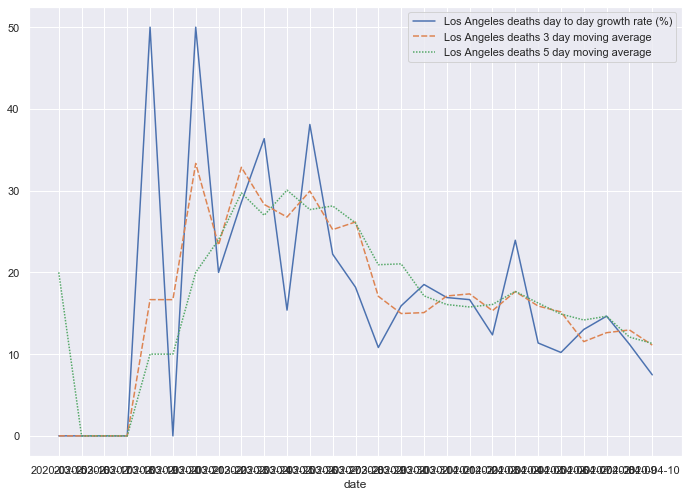

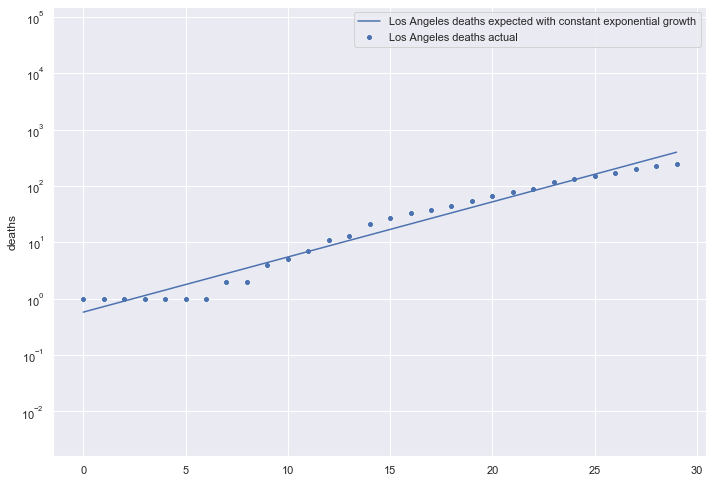

Trajectory plots for Los Angeles, to see when the curve starts flattening


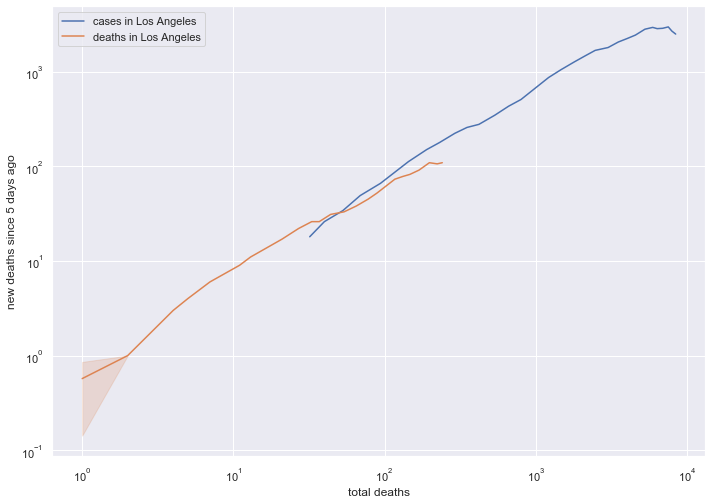

Correlations for Los Angeles:


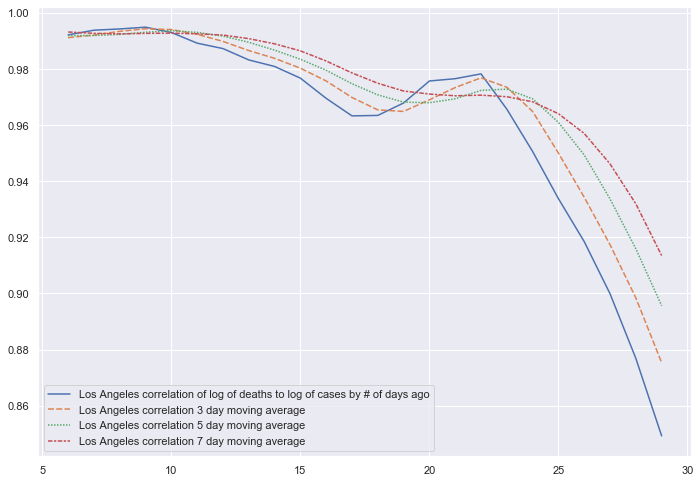

Deaths vs Lagged Values For Los Angeles:


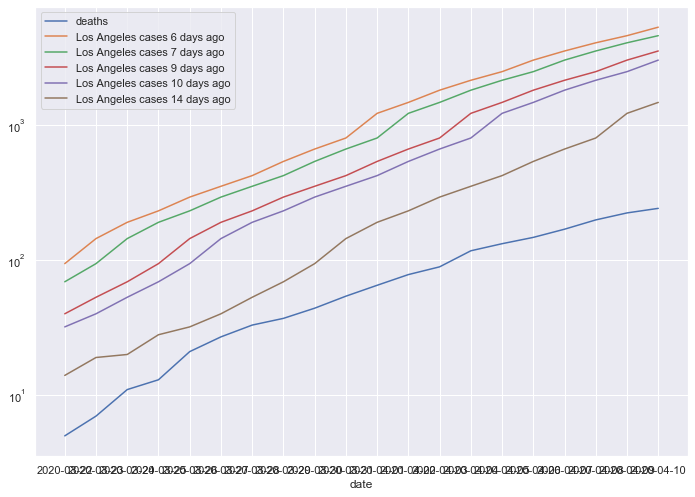

Deaths / Lagged Values For Los Angeles:


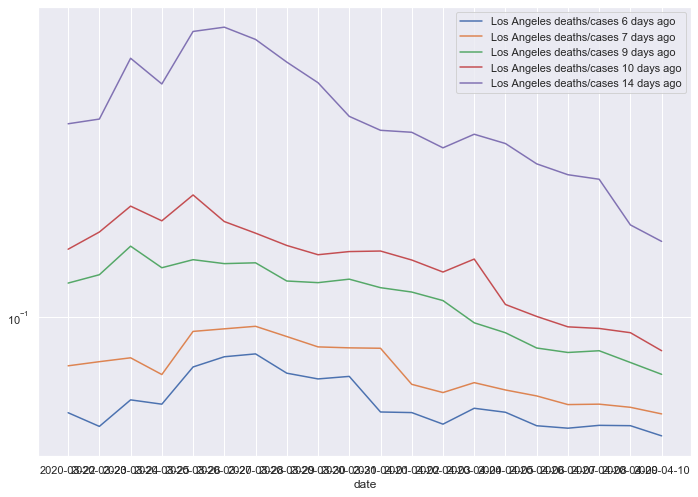


### Analysis for Boulder ###

Boulder cases exponential formula fitted with 28 points:
cases = 6.31 * exp(0.1556 * day)
fitted daily growth rate: 16.84 %, fitted days to doubling: 4.45
actual daily growth rate: 5.39 %, actual days to doubling: 12.86


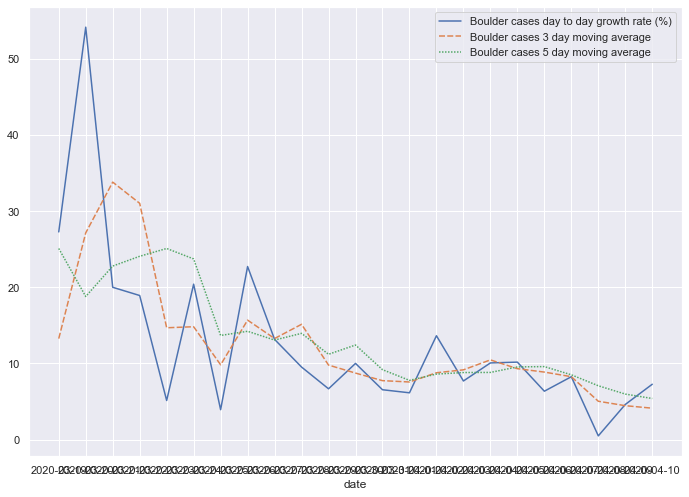

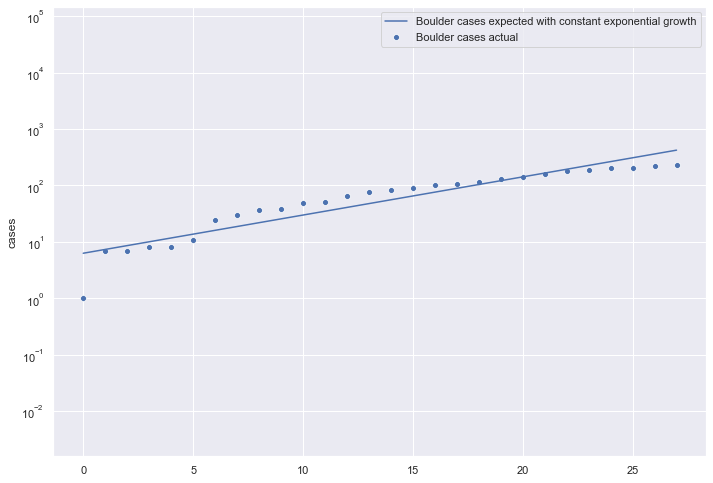

Boulder deaths exponential formula fitted with 15 points:
deaths = 0.88 * exp(0.1343 * day)
fitted daily growth rate: 14.38 %, fitted days to doubling: 5.16
actual daily growth rate: 11.43 %, actual days to doubling: 6.07


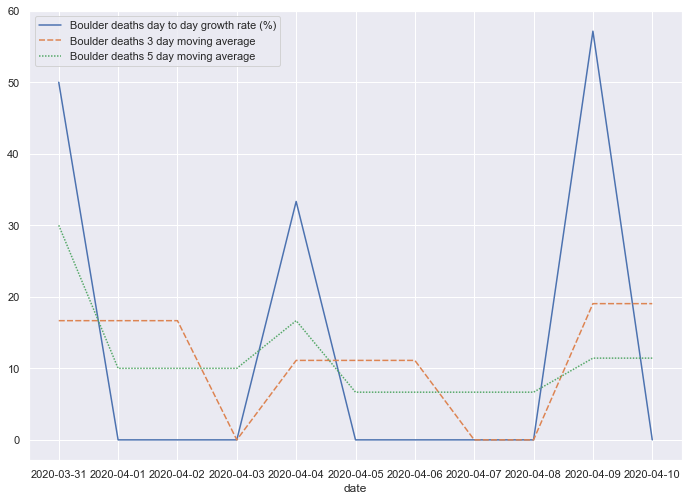

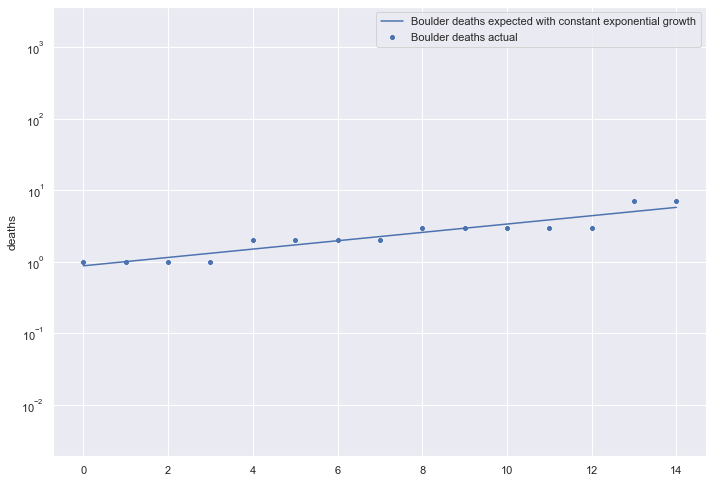

Trajectory plots for Boulder, to see when the curve starts flattening


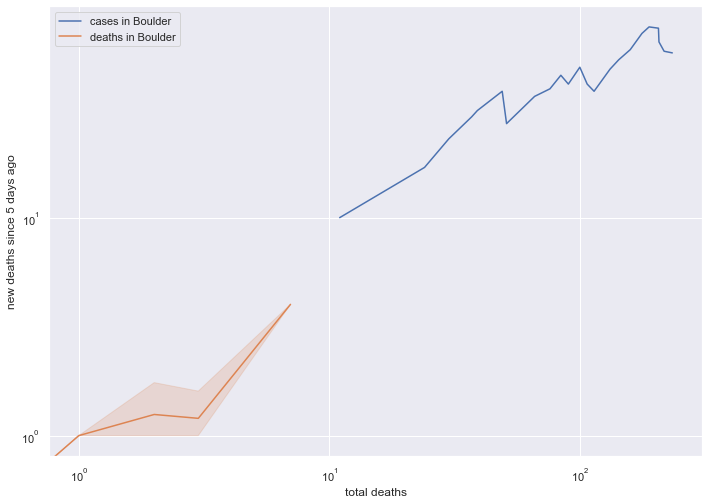

Correlations for Boulder:


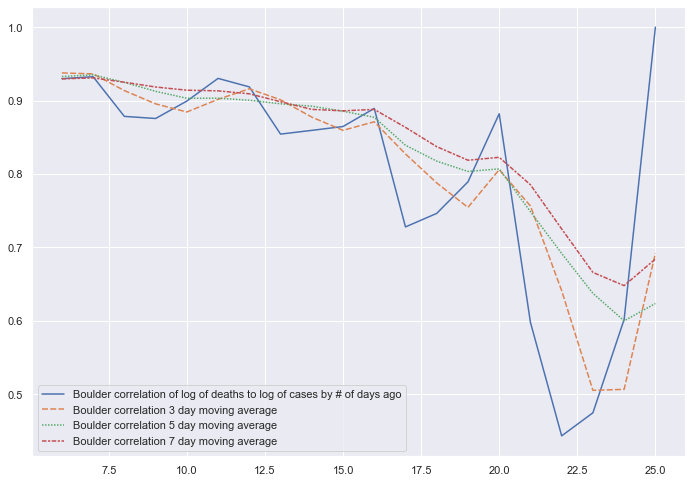

Deaths vs Lagged Values For Boulder:


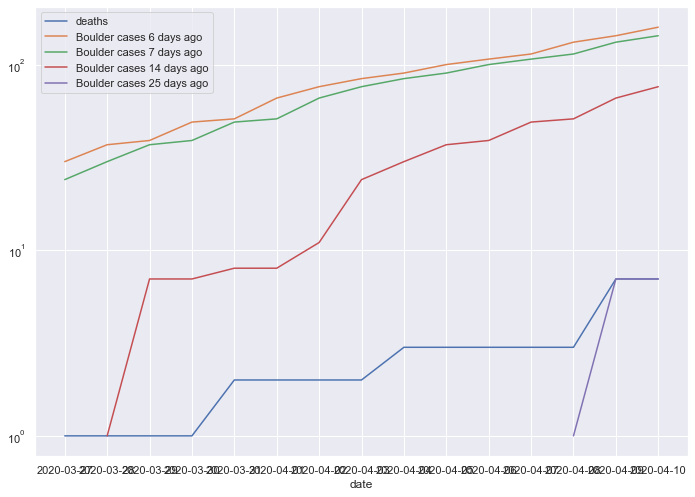

Deaths / Lagged Values For Boulder:


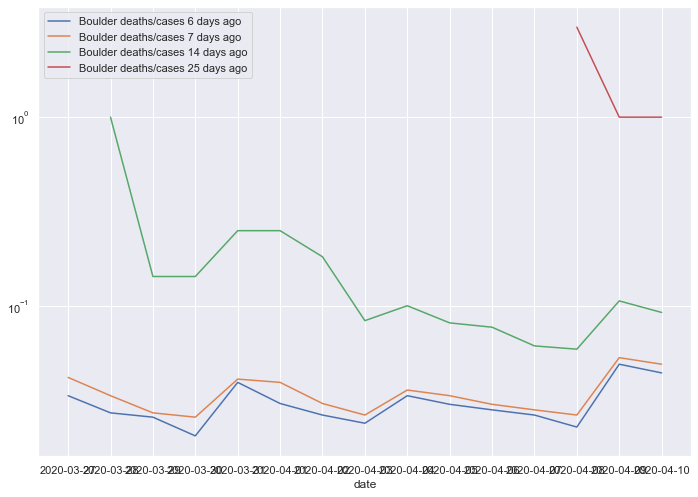


### Analysis for Denver ###

Denver cases exponential formula fitted with 30 points:
cases = 19.94 * exp(0.158 * day)
fitted daily growth rate: 17.12 %, fitted days to doubling: 4.39
actual daily growth rate: 5.78 %, actual days to doubling: 12.0


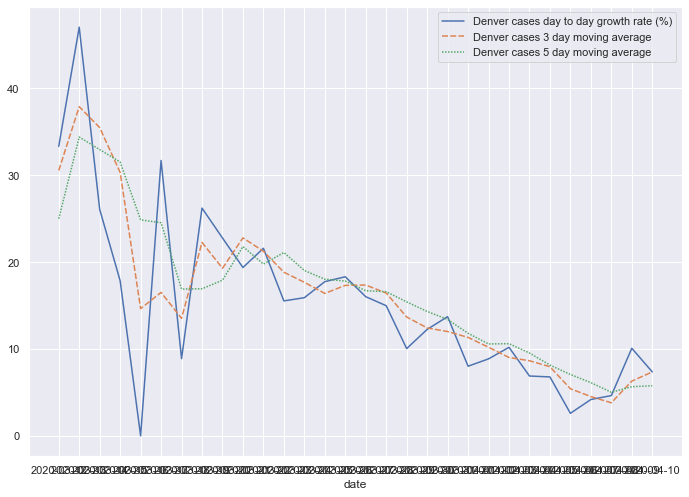

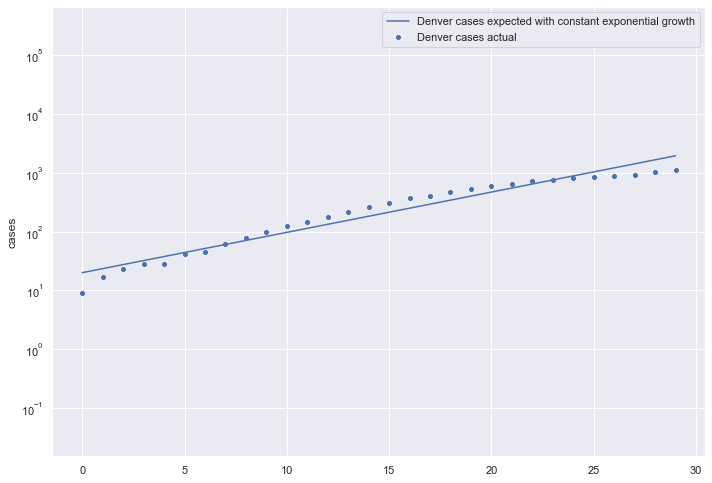

Denver deaths exponential formula fitted with 17 points:
deaths = 2.55 * exp(0.1757 * day)
fitted daily growth rate: 19.21 %, fitted days to doubling: 3.95
actual daily growth rate: 14.74 %, actual days to doubling: 4.7


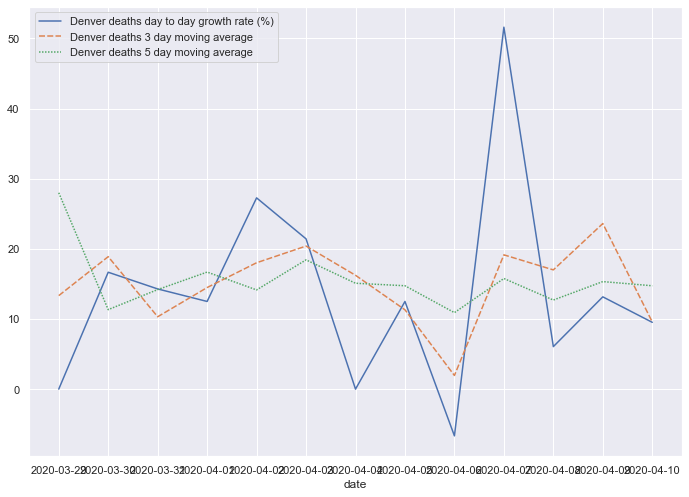

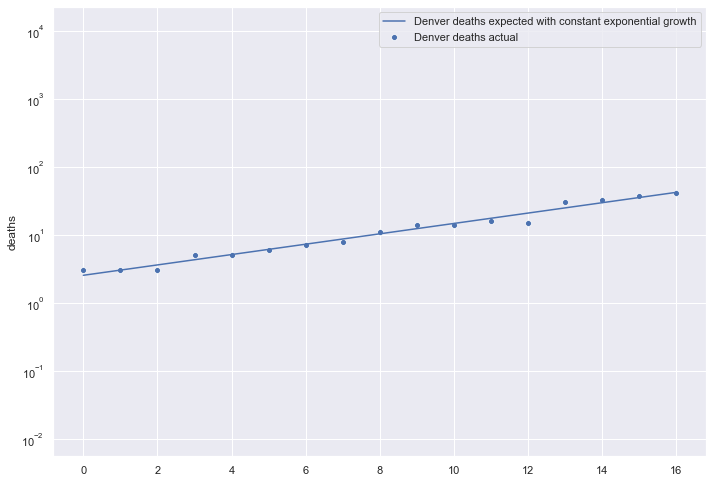

Trajectory plots for Denver, to see when the curve starts flattening


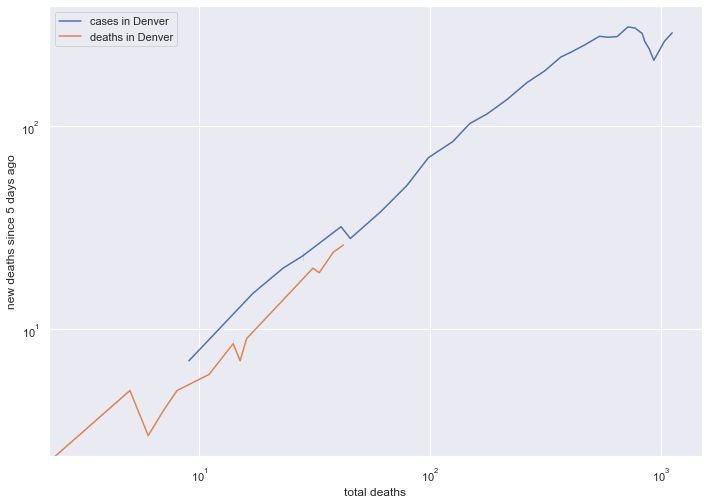

Correlations for Denver:


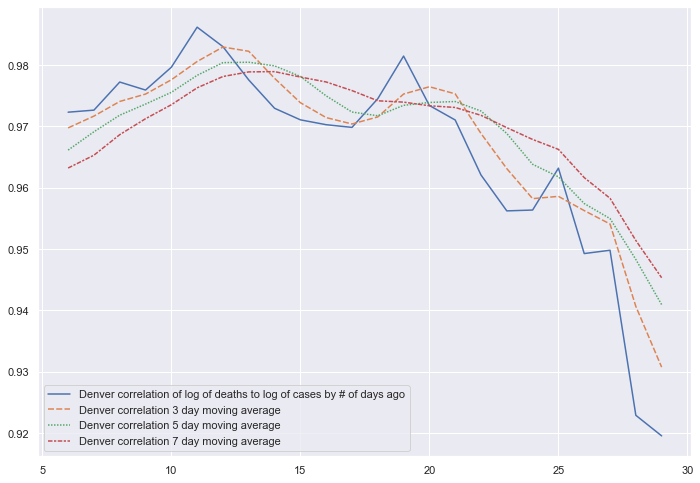

Deaths vs Lagged Values For Denver:


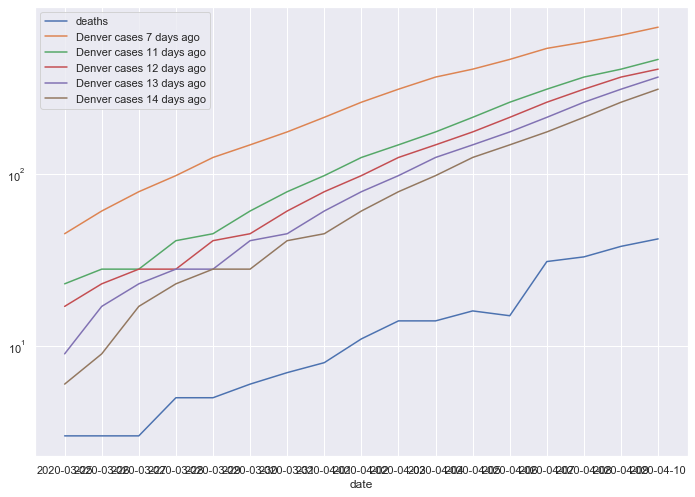

Deaths / Lagged Values For Denver:


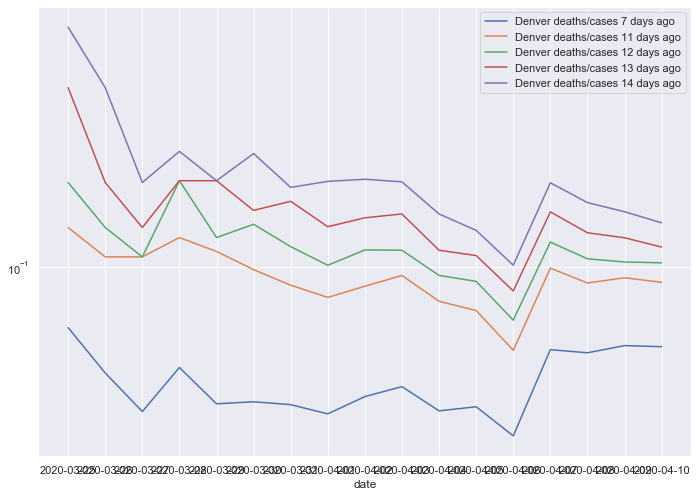


### Analysis for New York City ###

New York City cases exponential formula fitted with 30 points:
cases = 376.15 * exp(0.2283 * day)
fitted daily growth rate: 25.65 %, fitted days to doubling: 3.04
actual daily growth rate: 6.03 %, actual days to doubling: 11.5


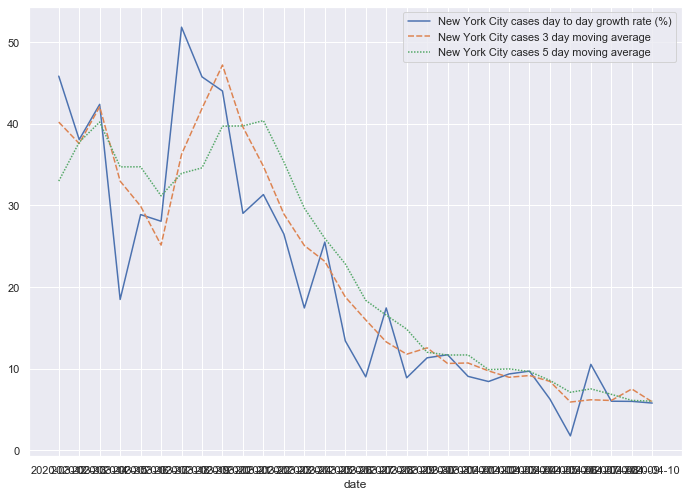

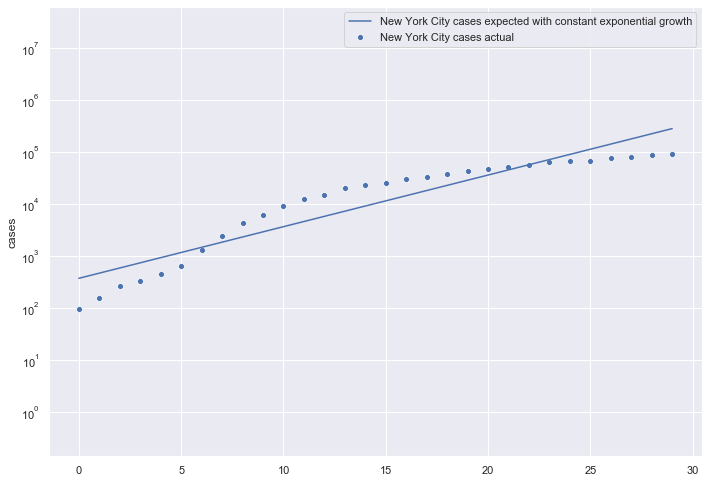

New York City deaths exponential formula fitted with 28 points:
deaths = 6.33 * exp(0.2836 * day)
fitted daily growth rate: 32.79 %, fitted days to doubling: 2.44
actual daily growth rate: 14.95 %, actual days to doubling: 4.64


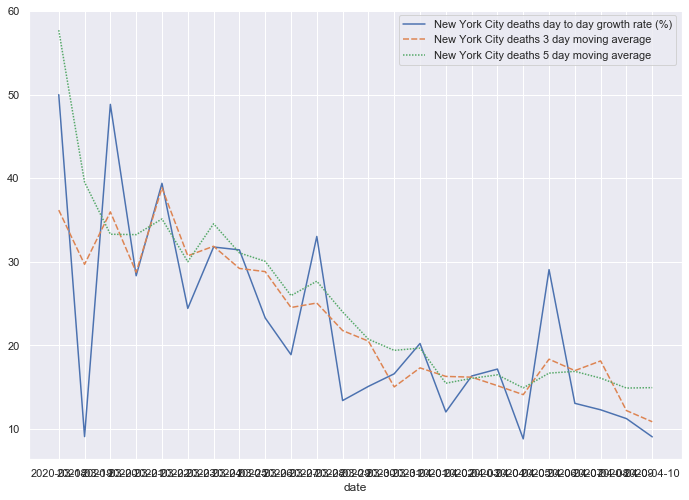

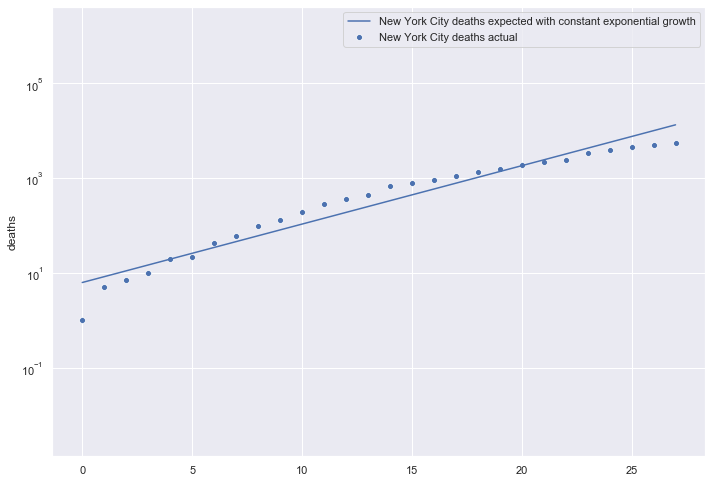

Trajectory plots for New York City, to see when the curve starts flattening


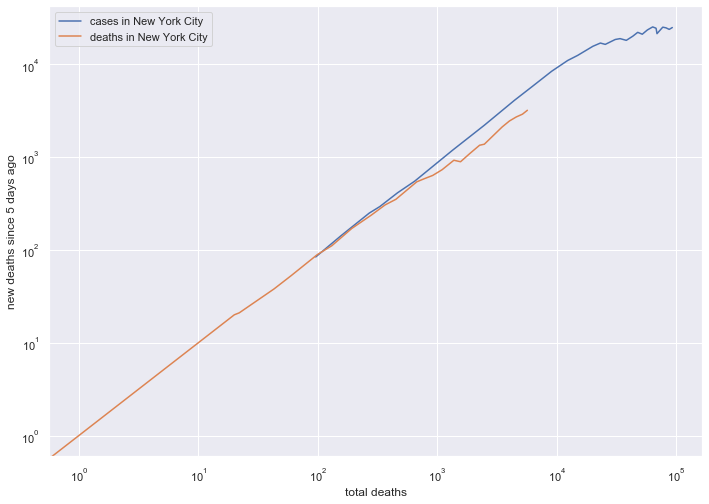

Correlations for New York City:


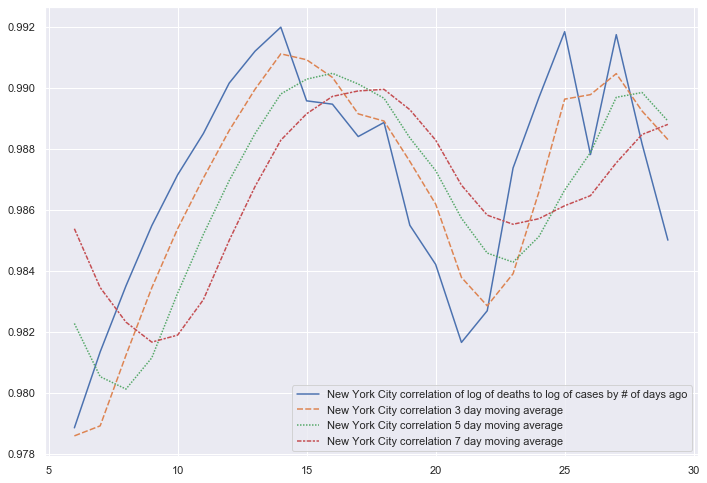

Deaths vs Lagged Values For New York City:


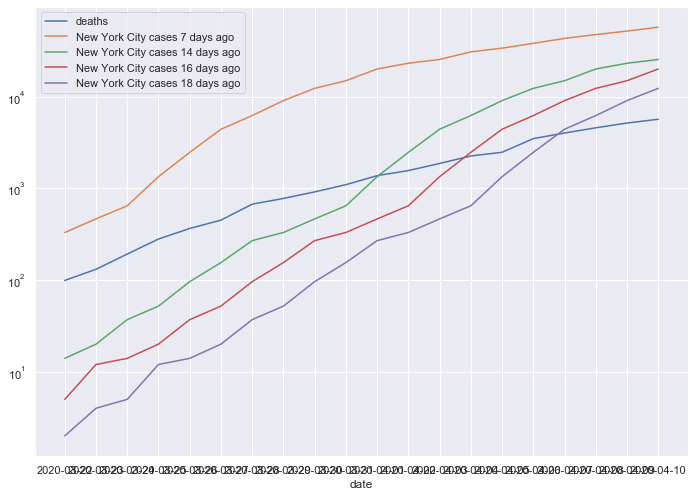

Deaths / Lagged Values For New York City:


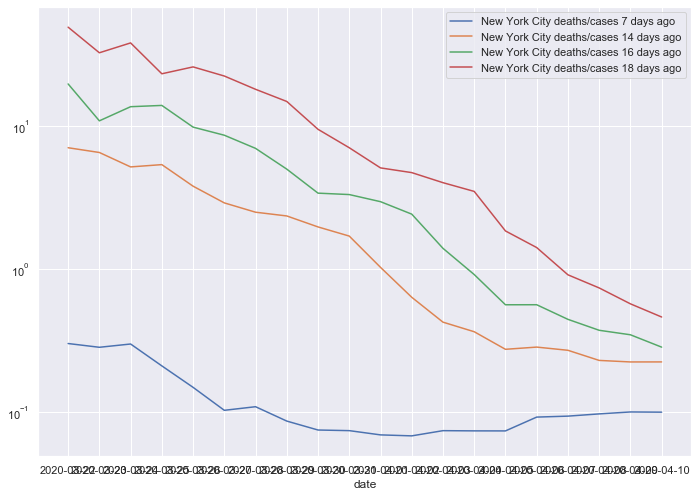


### Analysis for California ###

California cases exponential formula fitted with 30 points:
cases = 349.29 * exp(0.1578 * day)
fitted daily growth rate: 17.09 %, fitted days to doubling: 4.39
actual daily growth rate: 6.58 %, actual days to doubling: 10.54


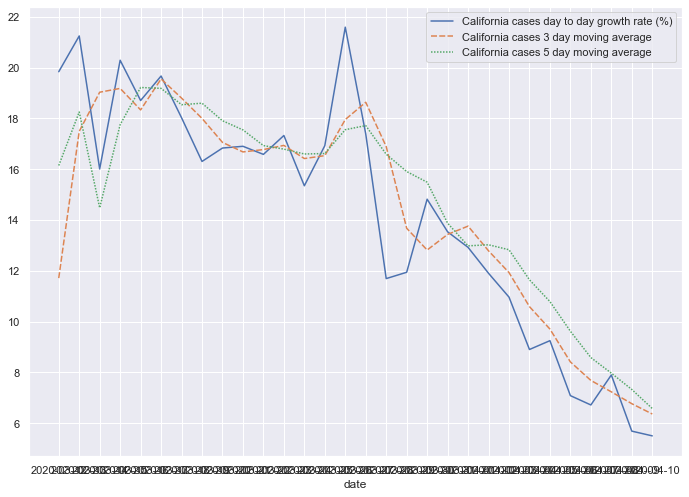

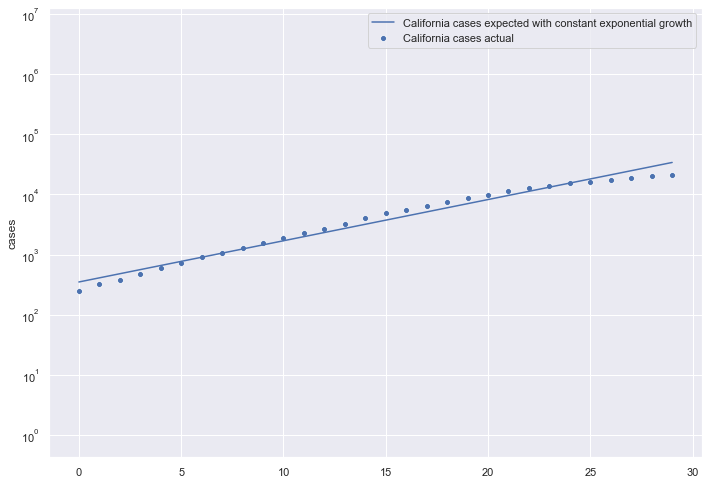

California deaths exponential formula fitted with 30 points:
deaths = 5.32 * exp(0.1771 * day)
fitted daily growth rate: 19.38 %, fitted days to doubling: 3.91
actual daily growth rate: 9.96 %, actual days to doubling: 6.96


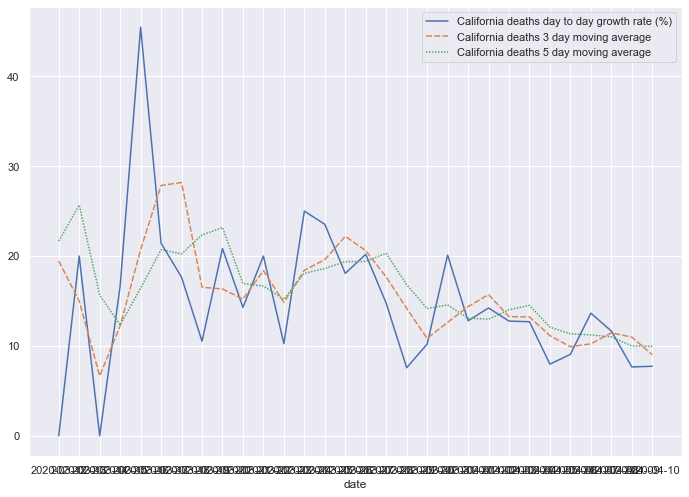

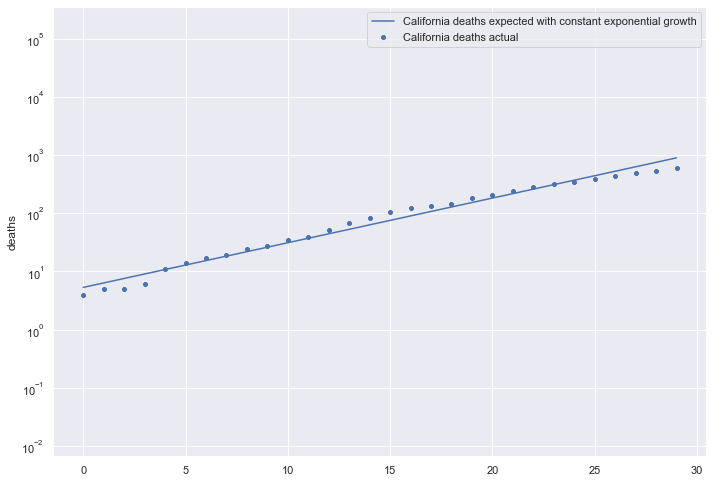

Trajectory plots for California, to see when the curve starts flattening


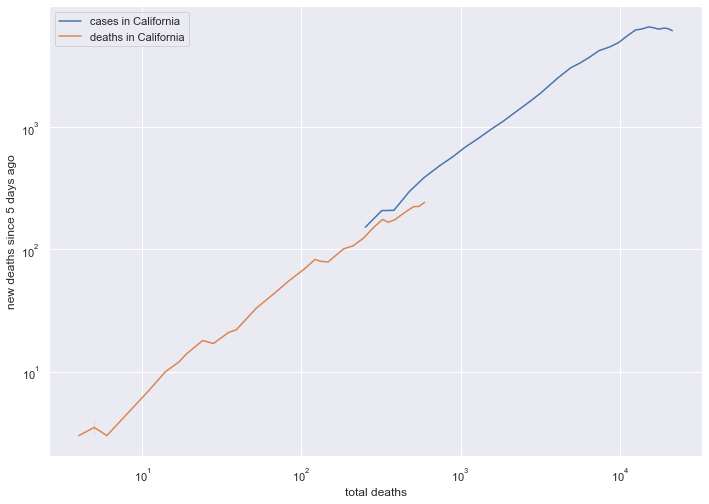

Correlations for California:


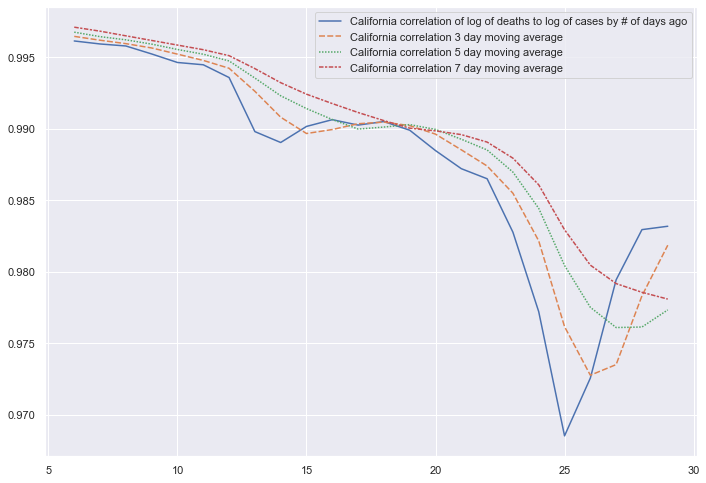

Deaths vs Lagged Values For California:


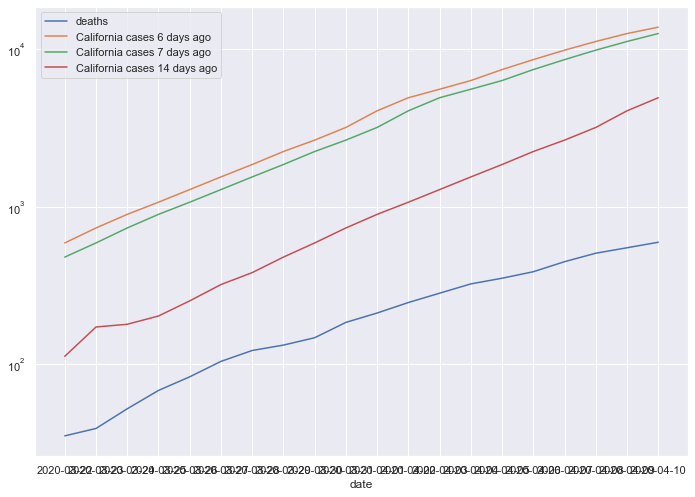

Deaths / Lagged Values For California:


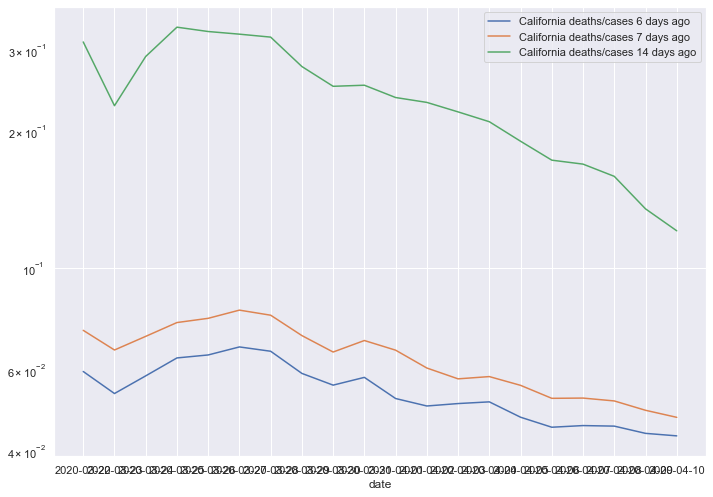


### Analysis for Colorado ###

Colorado cases exponential formula fitted with 30 points:
cases = 92.28 * exp(0.168 * day)
fitted daily growth rate: 18.3 %, fitted days to doubling: 4.13
actual daily growth rate: 5.27 %, actual days to doubling: 13.16


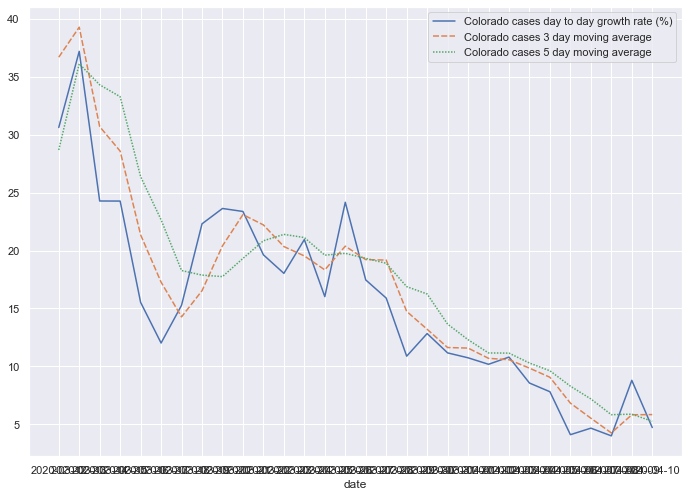

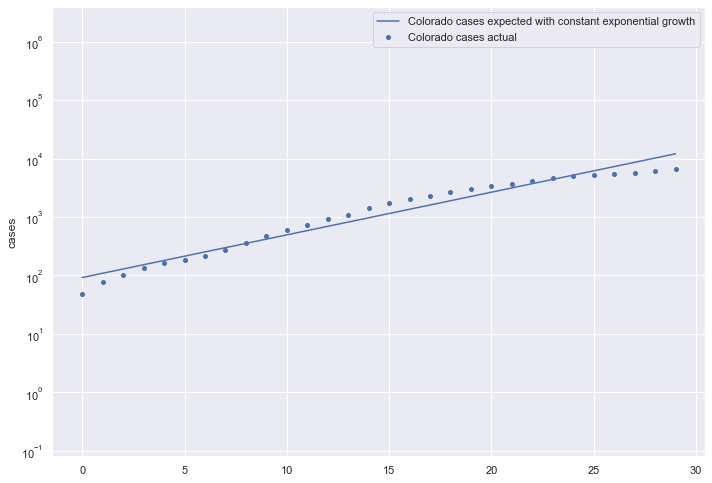

Colorado deaths exponential formula fitted with 30 points:
deaths = 1.22 * exp(0.1974 * day)
fitted daily growth rate: 21.82 %, fitted days to doubling: 3.51
actual daily growth rate: 11.07 %, actual days to doubling: 6.26


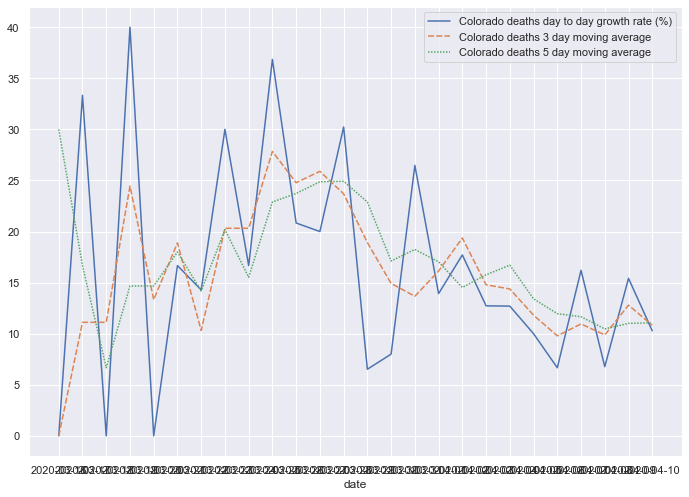

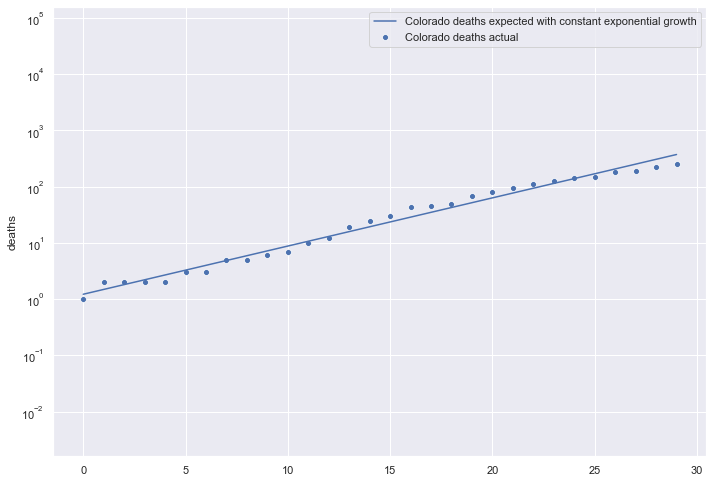

Trajectory plots for Colorado, to see when the curve starts flattening


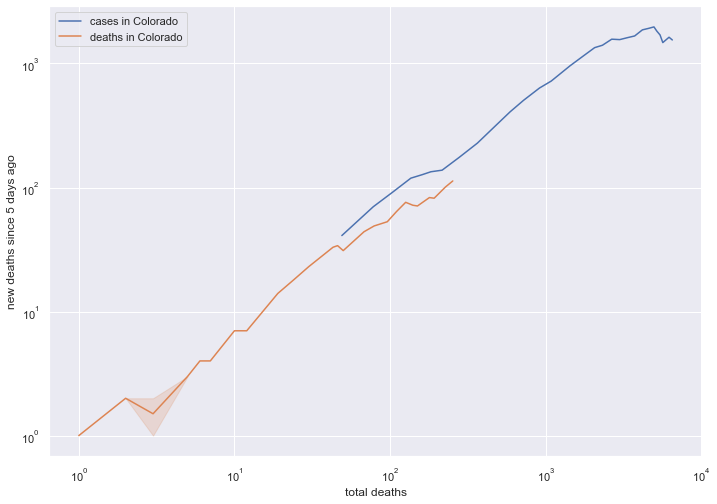

Correlations for Colorado:


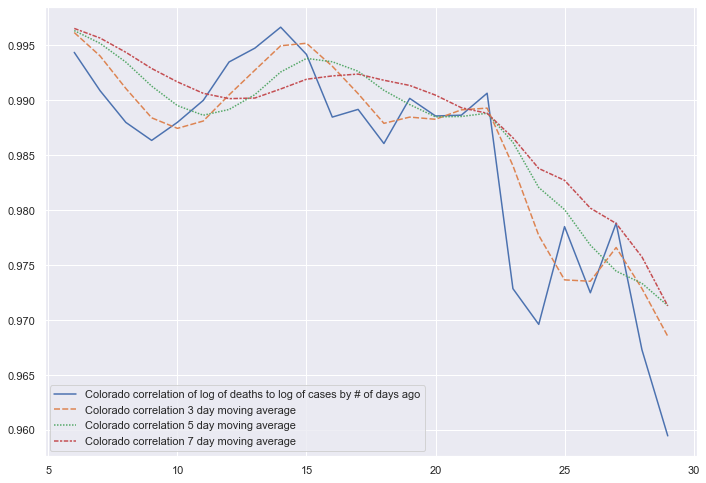

Deaths vs Lagged Values For Colorado:


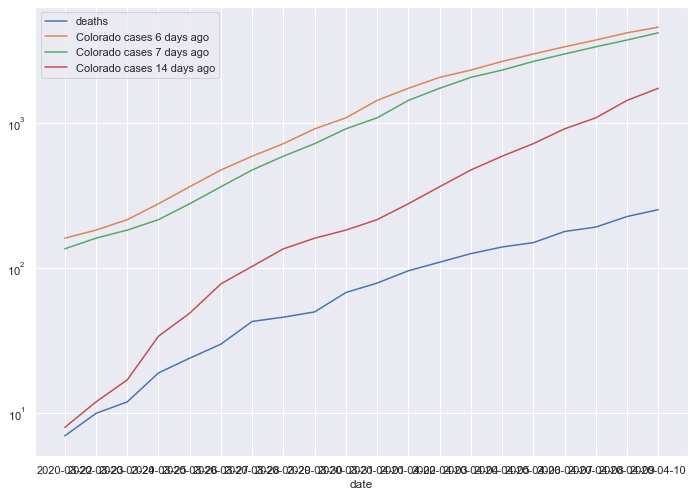

Deaths / Lagged Values For Colorado:


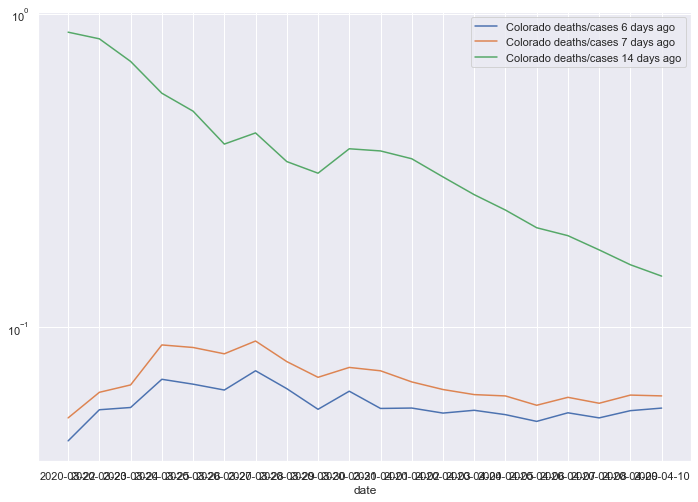


### Analysis for Arizona ###

Arizona cases exponential formula fitted with 30 points:
cases = 11.51 * exp(0.225 * day)
fitted daily growth rate: 25.24 %, fitted days to doubling: 3.08
actual daily growth rate: 6.09 %, actual days to doubling: 11.38


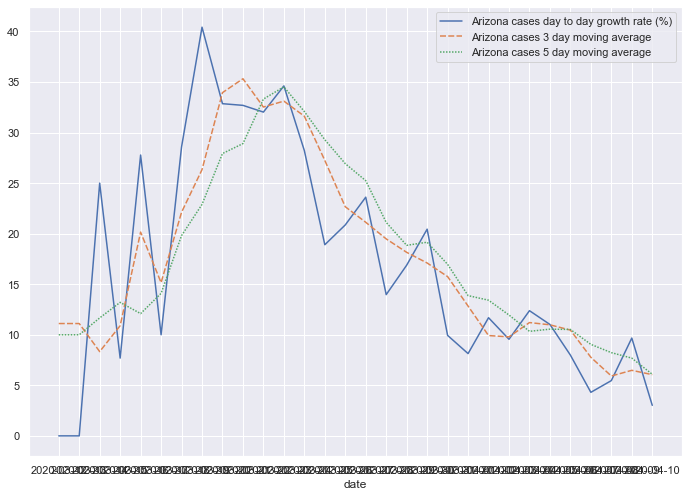

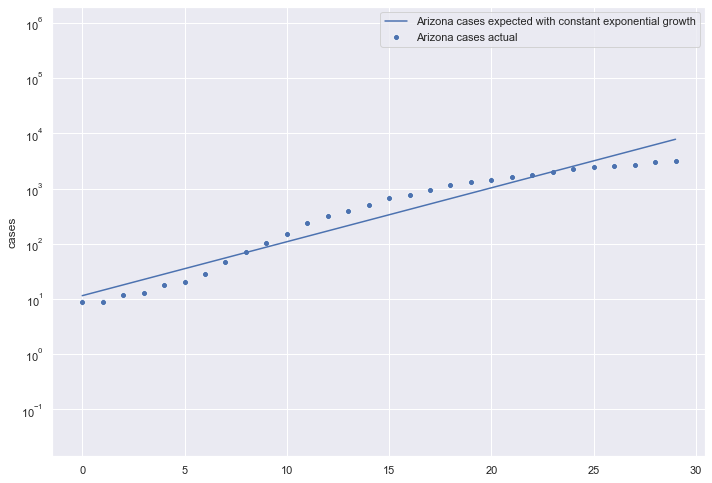

Arizona deaths exponential formula fitted with 22 points:
deaths = 1.28 * exp(0.2304 * day)
fitted daily growth rate: 25.91 %, fitted days to doubling: 3.01
actual daily growth rate: 7.9 %, actual days to doubling: 8.78


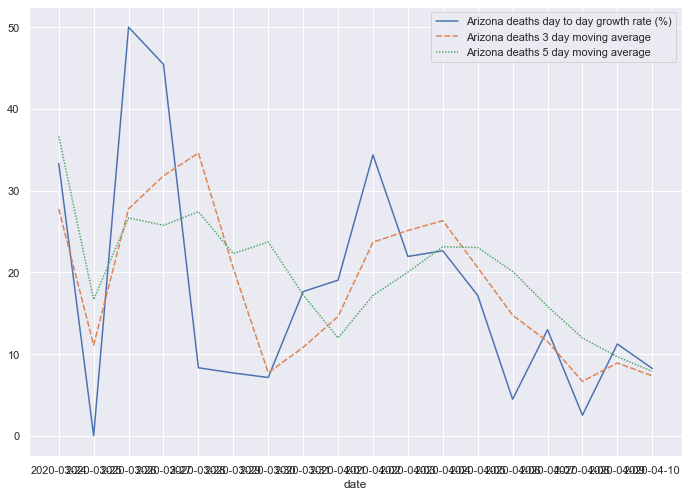

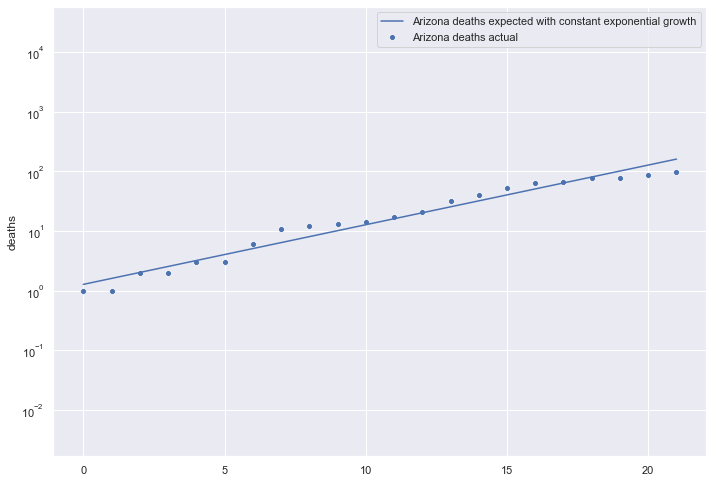

Trajectory plots for Arizona, to see when the curve starts flattening


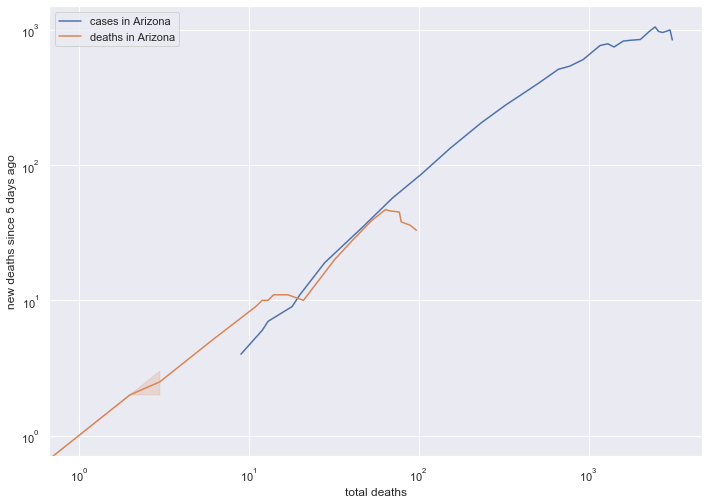

Correlations for Arizona:


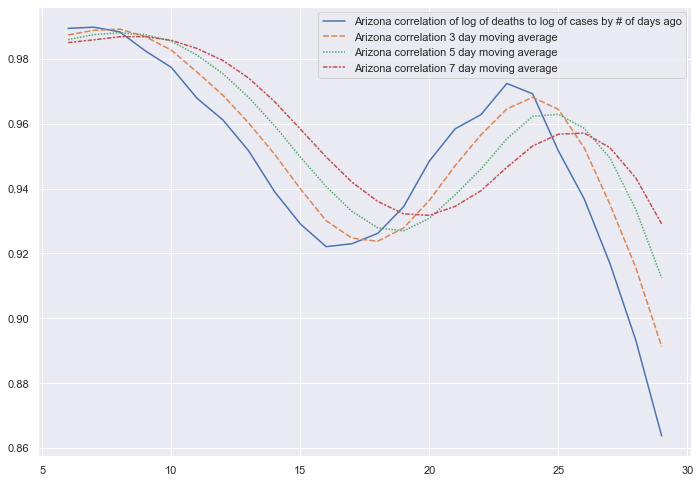

Deaths vs Lagged Values For Arizona:


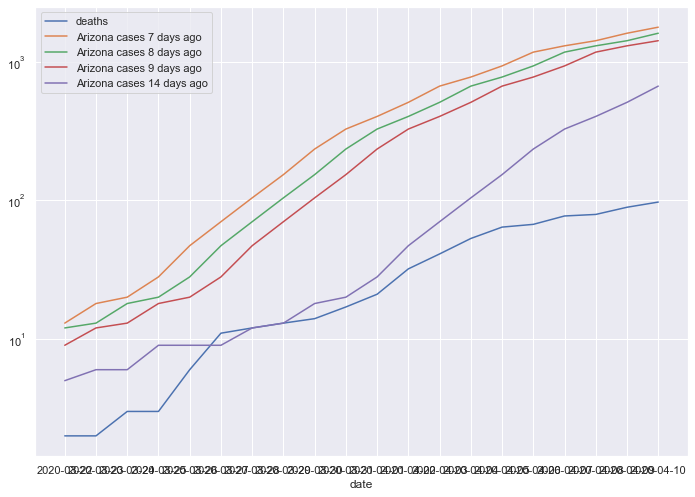

Deaths / Lagged Values For Arizona:


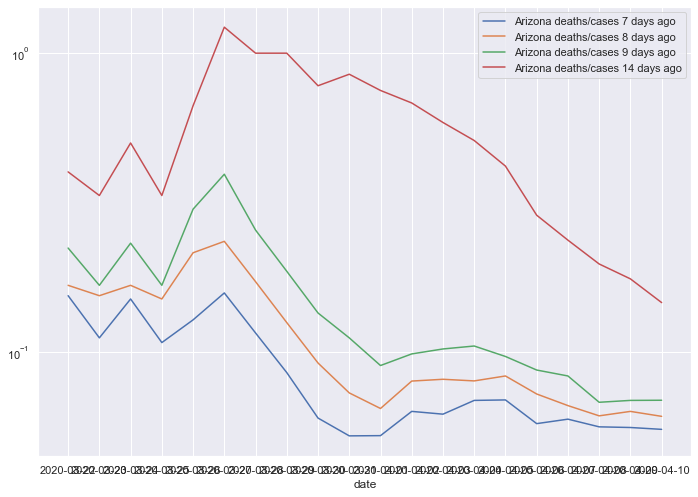


### Analysis for USA total: ###

USA total: cases exponential formula fitted with 30 points:
cases = 2975.87 * exp(0.2023 * day)
fitted daily growth rate: 22.42 %, fitted days to doubling: 3.43
actual daily growth rate: 7.5 %, actual days to doubling: 9.24


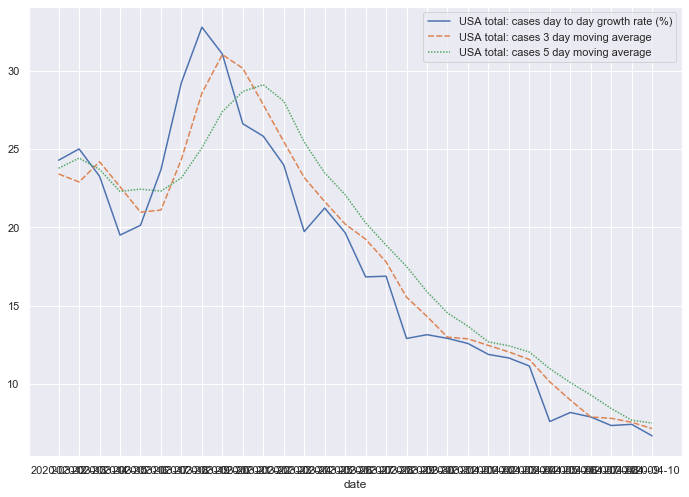

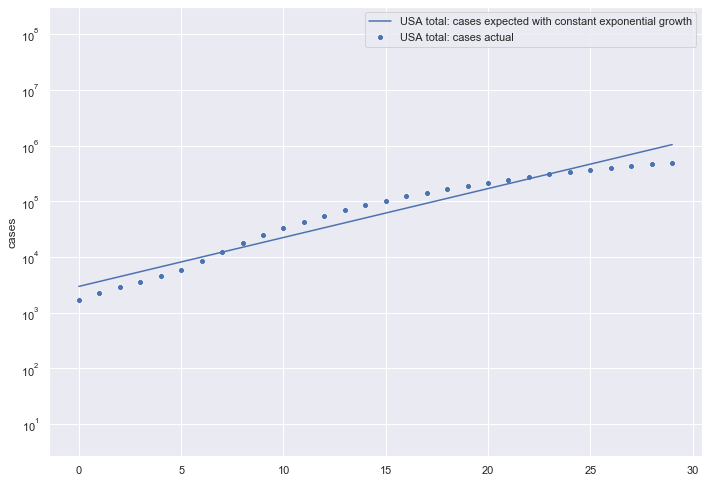

USA total: deaths exponential formula fitted with 30 points:
deaths = 44.59 * exp(0.2238 * day)
fitted daily growth rate: 25.08 %, fitted days to doubling: 3.1
actual daily growth rate: 12.35 %, actual days to doubling: 5.61


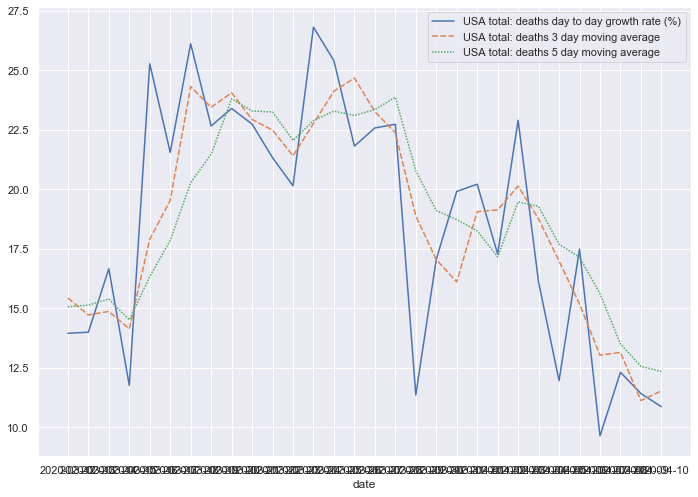

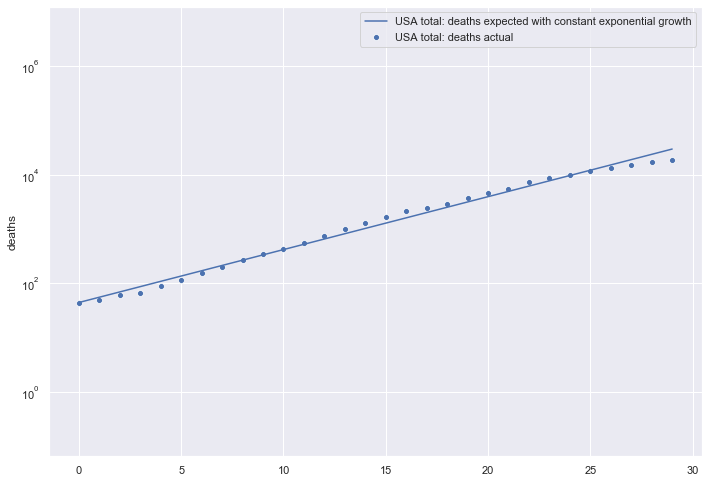

Trajectory plots for USA total:, to see when the curve starts flattening


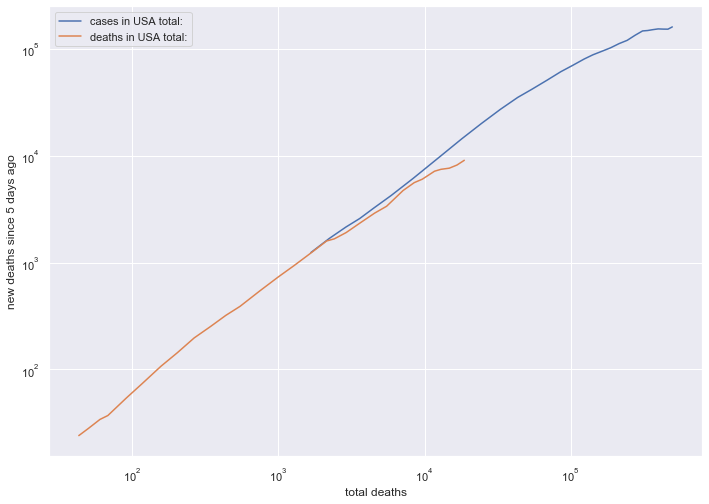

Correlations for USA total::


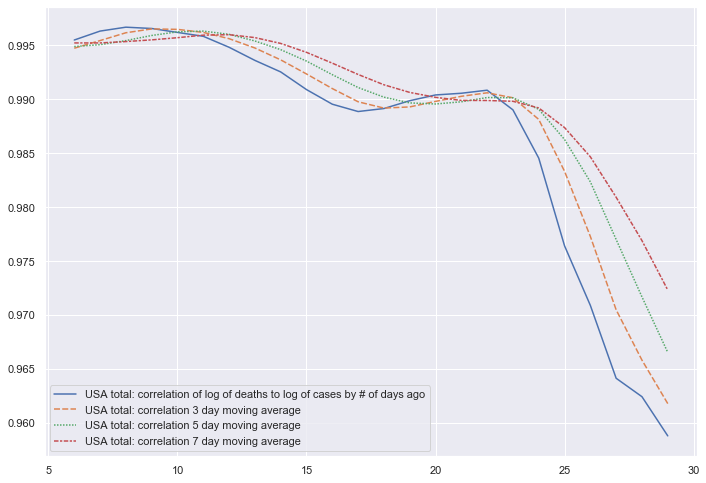

Deaths vs Lagged Values For USA total::


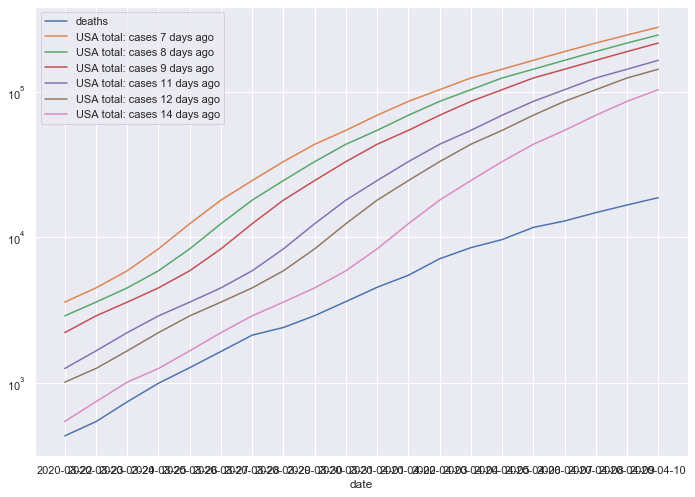

Deaths / Lagged Values For USA total::


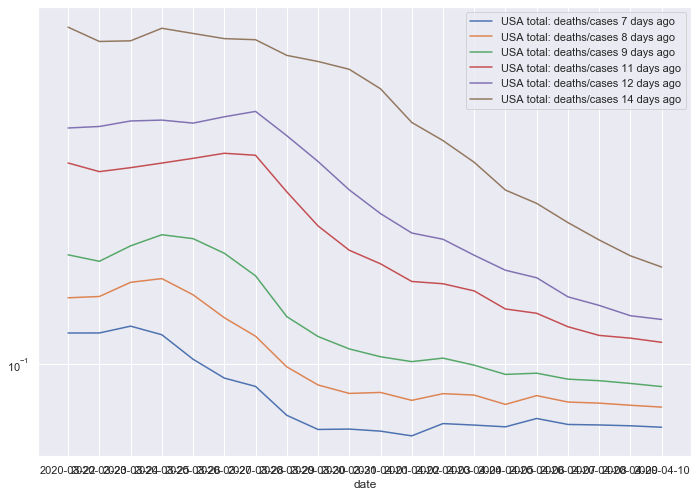

In [21]:
counties =["San Francisco", "Los Angeles", "Boulder", "Denver", "New York City"]
states = [ "California", "Colorado", "Arizona"]
analyse(counties=counties, states=states)